<h2> Large Language Model Architecture </h2>

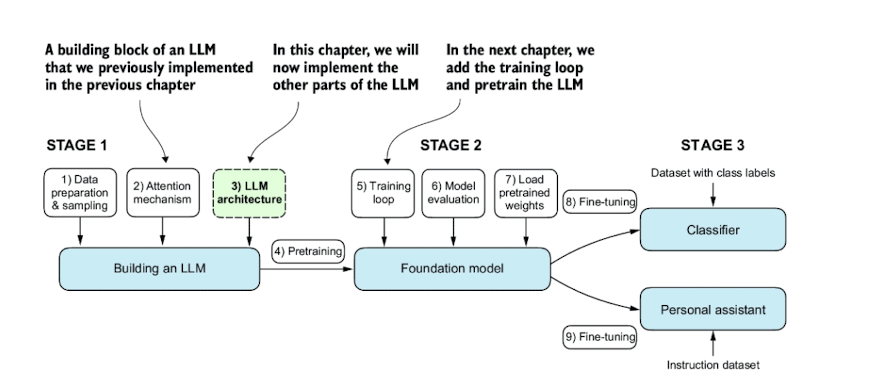

The three main stages of coding an LLM. This chapter focuses on step 3 of stage 1: implementing the LLM architecture.


Figure below provides a top-down view of a GPT-like LLM, with its main components highlighted.

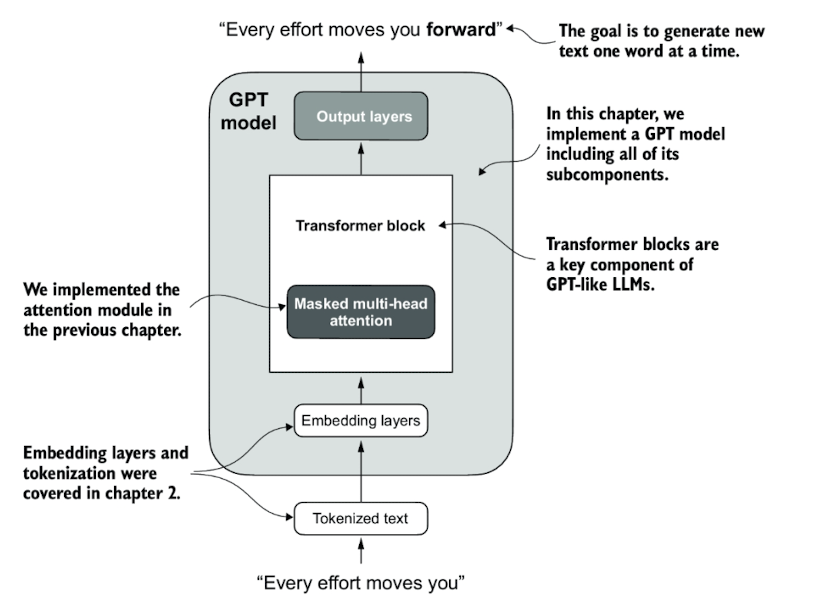

GPT model. In addition to the embedding layers, it consists of one or more transformer blocks containing the masked multi-head attention module we previously implemented.


The figure below provides a big-picture overview showing how the input data is tokenized, embedded, and fed to the GPT model. The token embedding is handled inside the GPT model. In LLMs, the embedded input token dimension typically matches the output dimension. The output embeddings here represent the context vectors.

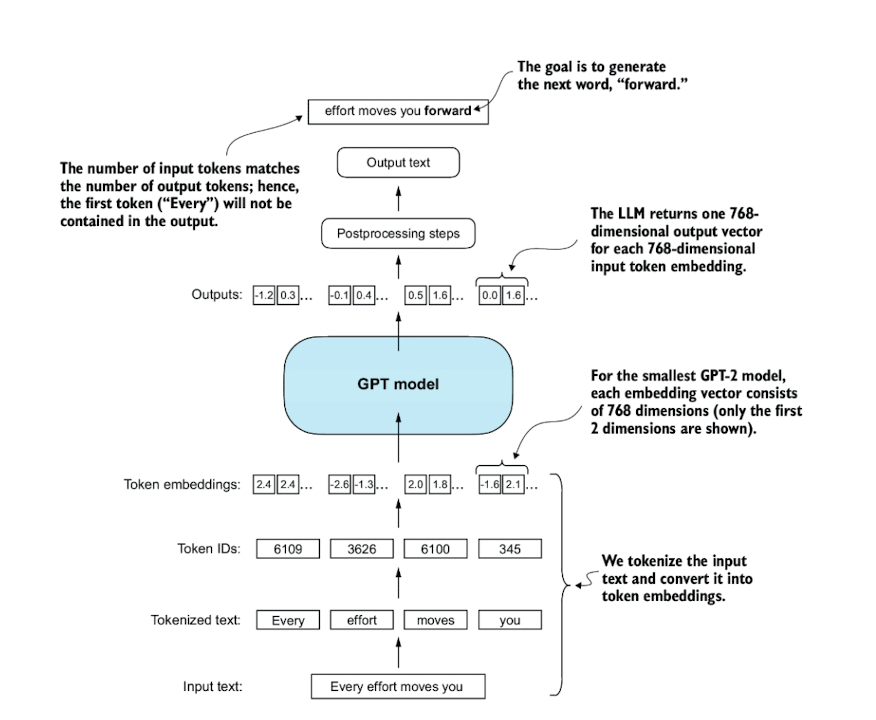



<h2> Transformer Block Components</h2>

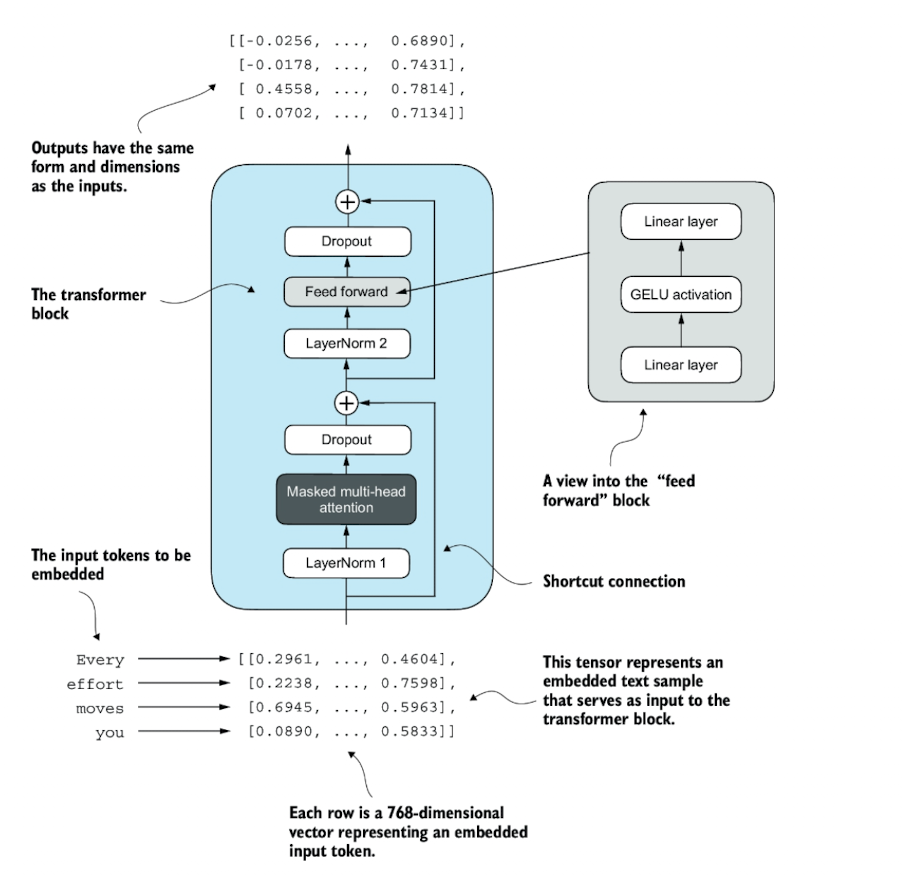

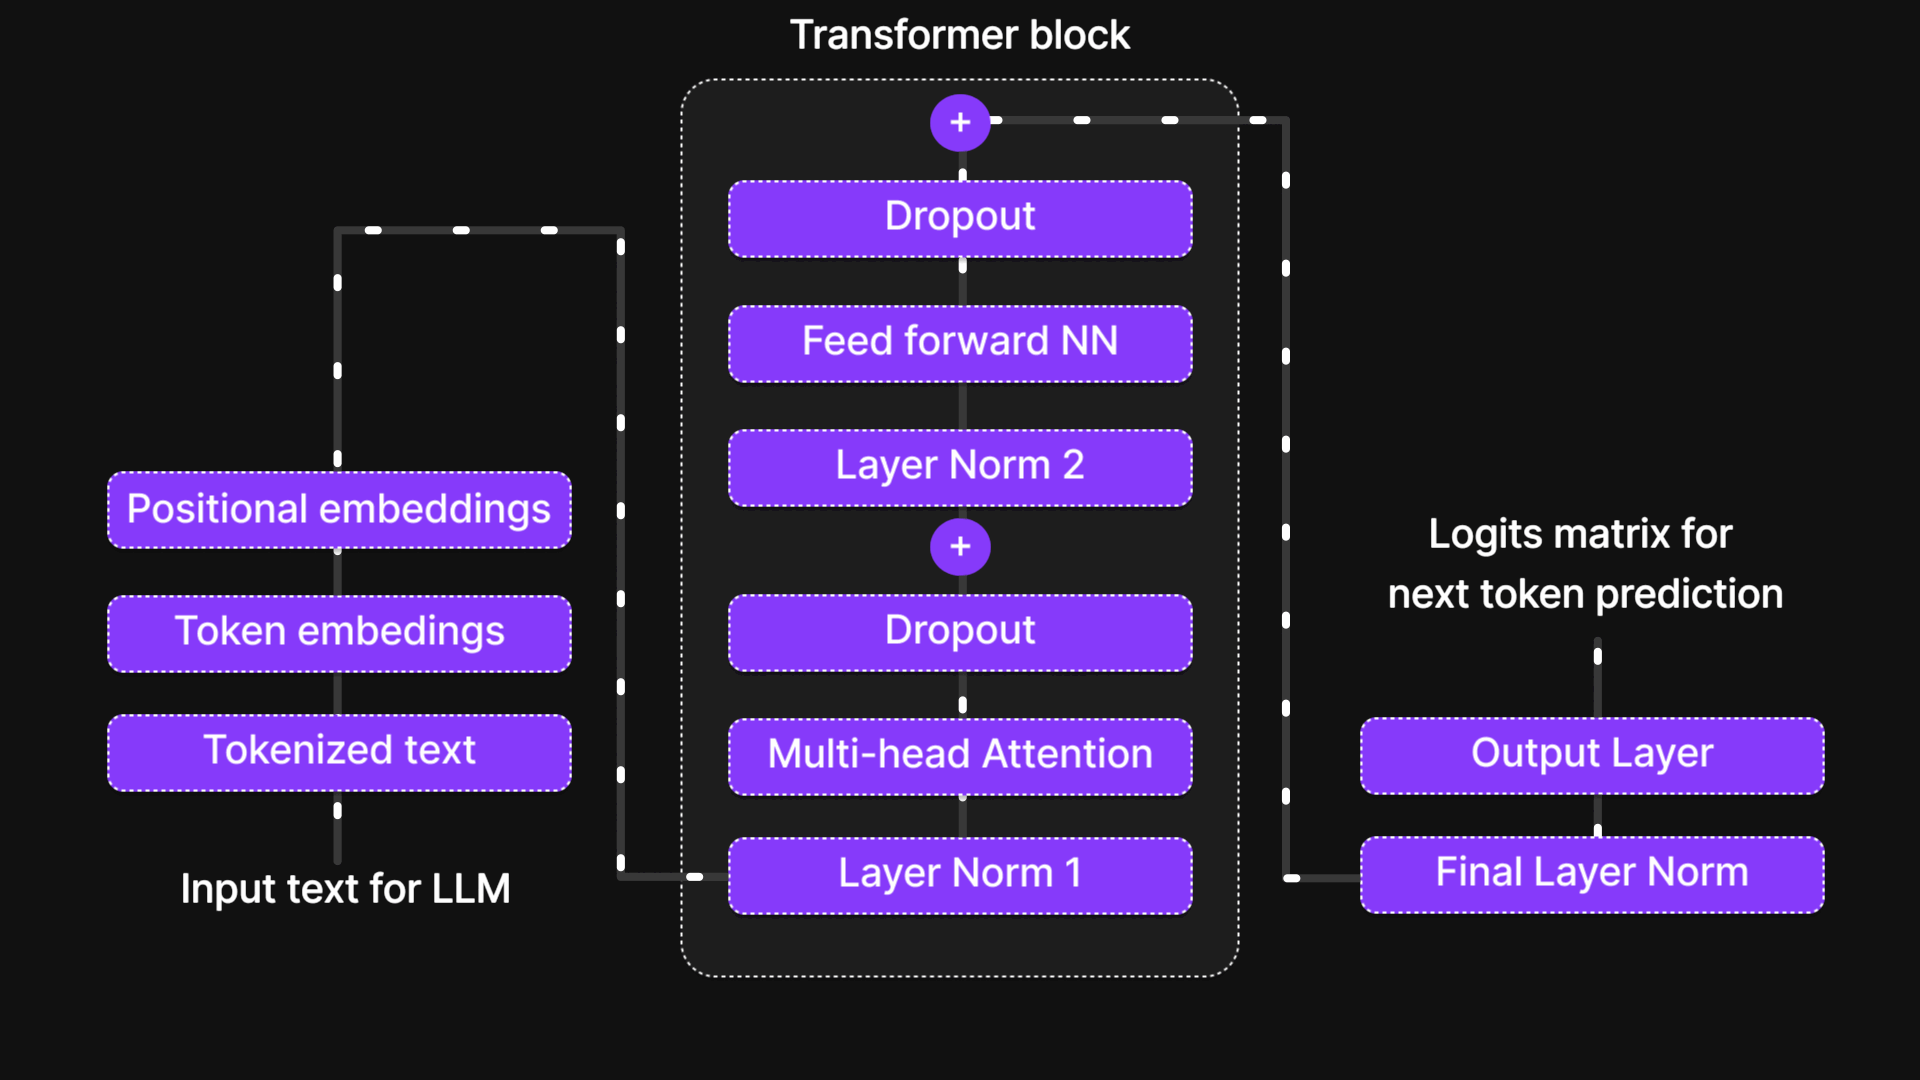

In [1]:
from IPython.display import Image
Image(filename='transformerblock.gif')

## IMPLEMENTING A GPT MODEL FROM SCRATCH TO GENERATE TEXT

<div class="alert alert-block alert-info">
We will be utilizing GPT-2 directly, adhering to the same architecture that was employed in constructing the GPT-2 model. As detailed in the original paper that introduced GPT-2, the model came in different sizes. The smaller variant initially had 117 million parameters, which was later adjusted to 124 million, while the larger model featured 1,542 million parameters.

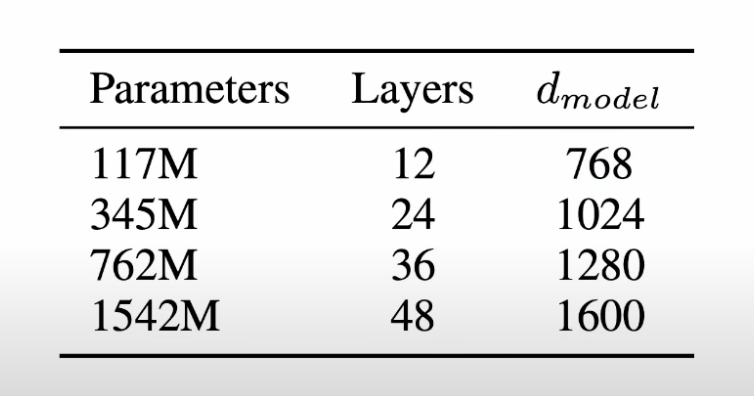

Why have we chosen to use GPT-2 instead of GPT-3 or GPT-4? One reason is that GPT-2 is more compact, making it more suitable for running locally on our machines. Additionally, OpenAI has only released the weights for GPT-2 publicly, which makes it more accessible for our purposes.
    
</div>

In [2]:
GPT_CONFIG_124M = {
    "vocab_size": 50257,    # Vocabulary size - tiktoken bpe
    "context_length": 1024, # Context length
    "emb_dim": 768,         # Embedding dimension
    "n_heads": 12,          # Number of attention heads
    "n_layers": 12,         # Number of layers
    "drop_rate": 0.1,       # Dropout rate
    "qkv_bias": False       # Query-Key-Value bias
}

<div class="alert alert-block alert-success">

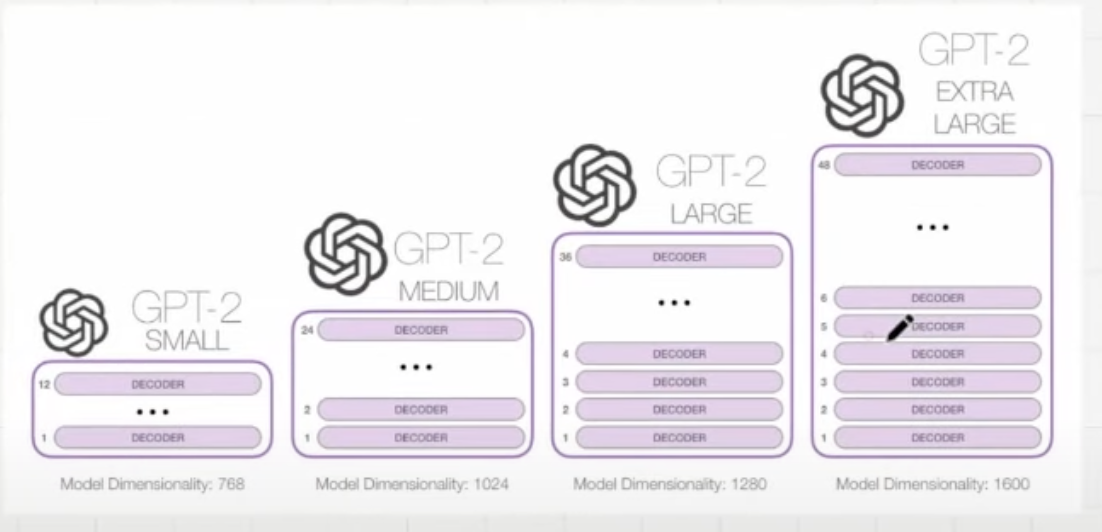

</div>

## GPT ARCHITECTURE PART 1: DUMMY GPT MODEL CLASS

<div class="alert alert-block alert-info">

We will build a GPT placeholder architecture, referred to as the dummy GPT model. This model will provide a comprehensive overview of how all the components integrate seamlessly.

Step 1: Use a placeholder for TransformerBlock

Step 2: Use a placeholder for LayerNorm
</div>

In [3]:
import torch
import torch.nn as nn


class DummyGPTModel(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        self.tok_emb = nn.Embedding(cfg["vocab_size"], cfg["emb_dim"])
        self.pos_emb = nn.Embedding(cfg["context_length"], cfg["emb_dim"])
        self.drop_emb = nn.Dropout(cfg["drop_rate"])
        
        # Use a placeholder for TransformerBlock
        self.trf_blocks = nn.Sequential(
            *[DummyTransformerBlock(cfg) for _ in range(cfg["n_layers"])])
        
        # Use a placeholder for LayerNorm
        self.final_norm = DummyLayerNorm(cfg["emb_dim"])
        self.out_head = nn.Linear(
            cfg["emb_dim"], cfg["vocab_size"], bias=False
        )

    def forward(self, in_idx):
        batch_size, seq_len = in_idx.shape
        tok_embeds = self.tok_emb(in_idx)
        pos_embeds = self.pos_emb(torch.arange(seq_len, device=in_idx.device))
        x = tok_embeds + pos_embeds
        x = self.drop_emb(x)
        x = self.trf_blocks(x)
        x = self.final_norm(x)
        logits = self.out_head(x)
        return logits


class DummyTransformerBlock(nn.Module):
    def __init__(self, cfg):
        super().__init__()
        # A simple placeholder

    def forward(self, x):
        # This block does nothing and just returns its input.
        return x


class DummyLayerNorm(nn.Module):
    def __init__(self, normalized_shape, eps=1e-5):
        super().__init__()
        # The parameters here are just to mimic the LayerNorm interface.

    def forward(self, x):
        # This layer does nothing and just returns its input.
        return x

<div class="alert alert-block alert-warning">

The DummyGPTModel class in this code defines a simplified version of a GPT-like model using
PyTorch's neural network module (nn.Module). 

The model architecture in the
DummyGPTModel class consists of token and positional embeddings, dropout, a series of
transformer blocks (DummyTransformerBlock), a final layer normalization
(DummyLayerNorm), and a linear output layer (out_head). 

The configuration is passed in via
a Python dictionary, for instance, the GPT_CONFIG_124M dictionary we created earlier.

</div>

<div class="alert alert-block alert-warning">
    
The forward method describes the data flow through the model: it computes token and
positional embeddings for the input indices, applies dropout, processes the data through
the transformer blocks, applies normalization, and finally produces logits with the linear
output layer.

</div>

<div class="alert alert-block alert-warning">

The code above is already functional, as we will see later in this section after we prepare
the input data. 

However, for now, note in the code above that we have used placeholders
(DummyLayerNorm and DummyTransformerBlock) for the transformer block and layer
normalization, which we will develop in later sections

</div>

<div class="alert alert-block alert-success">

Next, we will prepare the input data and initialize a new GPT model to illustrate its
usage.

</div>

### STEP 1: TOKENIZATION

In [4]:
import tiktoken
tokenizer = tiktoken.get_encoding("gpt2")
batch = []
txt1 = "Every effort moves you"
txt2 = "Every day holds a"
batch.append(torch.tensor(tokenizer.encode(txt1)))
batch.append(torch.tensor(tokenizer.encode(txt2)))
batch = torch.stack(batch, dim=0)
print(batch)

tensor([[6109, 3626, 6100,  345],
        [6109, 1110, 6622,  257]])


### STEP 2: CREATE AN INSTANCE OF DUMMYGPTMODEL

In [5]:
torch.manual_seed(123)
model = DummyGPTModel(GPT_CONFIG_124M)
logits = model(batch)
print("Output shape:", logits.shape)
print(logits)

Output shape: torch.Size([2, 4, 50257])
tensor([[[-1.2034,  0.3201, -0.7130,  ..., -1.5548, -0.2390, -0.4667],
         [-0.1192,  0.4539, -0.4432,  ...,  0.2392,  1.3469,  1.2430],
         [ 0.5307,  1.6720, -0.4695,  ...,  1.1966,  0.0111,  0.5835],
         [ 0.0139,  1.6754, -0.3388,  ...,  1.1586, -0.0435, -1.0400]],

        [[-1.0908,  0.1798, -0.9484,  ..., -1.6047,  0.2439, -0.4530],
         [-0.7860,  0.5581, -0.0610,  ...,  0.4835, -0.0077,  1.6621],
         [ 0.3567,  1.2698, -0.6398,  ..., -0.0162, -0.1296,  0.3717],
         [-0.2407, -0.7349, -0.5102,  ...,  2.0057, -0.3694,  0.1814]]],
       grad_fn=<UnsafeViewBackward0>)


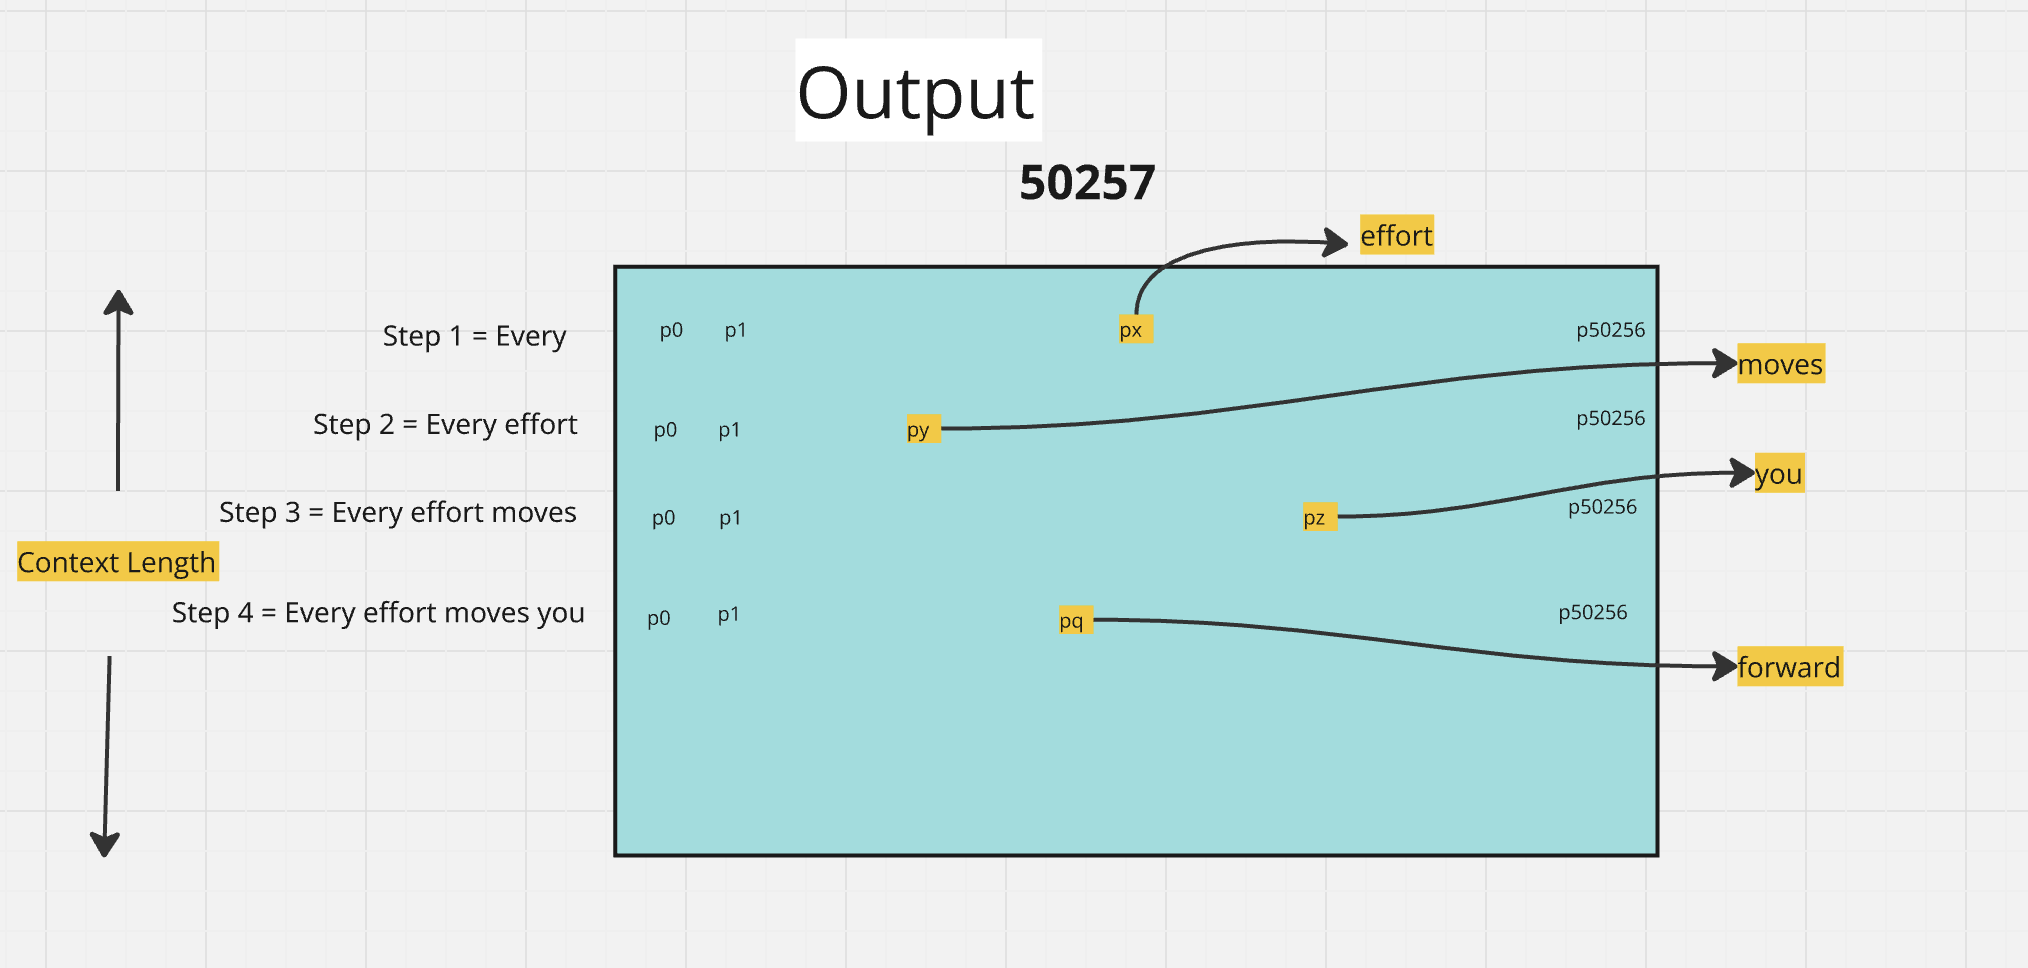

<div class="alert alert-block alert-warning">

The output tensor has two rows corresponding to the two text samples. Each text sample
consists of 4 tokens; each token is a 50,257-dimensional vector, which matches the size of
the tokenizer's vocabulary.


The embedding has 50,257 dimensions because each of these dimensions refers to a
unique token in the vocabulary. At the end of this chapter, when we implement the
postprocessing code, we will convert these 50,257-dimensional vectors back into token IDs,
which we can then decode into words.

</div>

<div class="alert alert-block alert-warning">

Now that we have taken a top-down look at the GPT architecture and its in- and outputs,
we will code the individual placeholders in the upcoming sections, starting with the real
layer normalization class that will replace the DummyLayerNorm in the previous code.

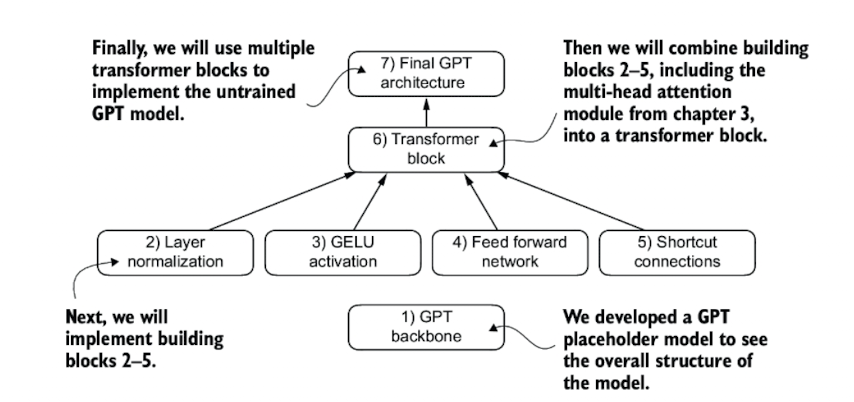

</div>

## GPT ARCHITECTURE PART 2: LAYER NORMALIZATION

<div class="alert alert-block alert-info">

Training deep neural networks with many layers can sometimes prove challenging due to problems like vanishing or exploding gradients. These problems lead to unstable training dynamics and make it difficult for the network to effectively adjust its weights, which means the learning process struggles to find a set of parameters (weights) for the neural network that minimizes the loss function. In other words, the network has difficulty learning the underlying patterns in the data to a degree that would allow it to make accurate predictions or decisions.

**Vanishing Gradients**

* **Definition:** The vanishing gradient problem occurs during the training of deep neural networks when the gradients of the loss function with respect to the parameters of the earlier layers become extremely small. This makes it difficult for the weights of these layers to be updated effectively, hindering the learning process.
* **Why it happens:**
    * **Activation functions:** Some activation functions, like sigmoid and tanh, have derivatives that are close to zero for large input values. When these functions are used in multiple layers, the gradients get multiplied together during backpropagation. If the derivatives are small, this repeated multiplication can make the overall gradient exponentially smaller as it propagates backward through the network.
    * **Network depth:** In very deep networks, the gradients have to travel through many layers. Each layer multiplies the gradient by its weights and the derivative of its activation function. If these values are consistently less than 1, the gradient shrinks with each layer it passes through.

**Exploding Gradients**

* **Definition:** The exploding gradient problem is the opposite of the vanishing gradient problem. It occurs when the gradients become excessively large during training. This can lead to unstable training, where the model weights are updated too drastically, potentially causing the training process to diverge and fail.
* **Why it happens:**
    * **Activation functions:** While less common, certain activation functions or their configurations can contribute to exploding gradients if they don't bound the output and have derivatives greater than 1.
    * **Network depth:** Similar to vanishing gradients, the repeated multiplication of gradients through many layers can cause them to explode if the weights and activation function derivatives are consistently greater than 1.
    * **Weight initialization:** Initializing the network weights with very large values can also lead to exploding gradients.

Both vanishing and exploding gradients are problems that arise during the training of deep neural networks due to the way gradients are calculated and propagated back through the network. They are often caused by the choice of activation functions and the depth of the network. Vanishing gradients slow down or prevent learning in earlier layers, while exploding gradients lead to unstable training and potential divergence.

**Internal Covariate Shift (ICS)** is a phenomenon in deep learning where the distribution of the network's activations changes during training as the network's parameters are updated.

**Why does it happen?**

* **Interconnected Layers:** In deep neural networks, each layer's output becomes the input for the next layer. As the parameters of earlier layers change during training, the input distribution to the subsequent layers also changes.
* **Non-linear Activations:** Non-linear activation functions can exacerbate this shift. Small changes in the input can lead to significant changes in the output, further altering the distribution for the next layer.
* **Impact on Training:** This constant change in input distribution forces each layer to continuously adapt, making the learning process slower and more difficult. It can also lead to issues like vanishing or exploding gradients.

**Summary**
Both vanishing and exploding gradients are problems that arise during the training of deep neural networks due to the way gradients are calculated and propagated back through the network. They are often caused by the choice of activation functions and the depth of the network. Vanishing gradients slow down or prevent learning in earlier layers, while exploding gradients lead to unstable training and potential divergence.

</div>

<div class="alert alert-block alert-success">

The main idea behind layer normalization is to adjust the activations (outputs) of a neural network layer to have a mean of 0 and a variance of 1, also known as unit variance. This adjustment speeds up the convergence to effective weights and ensures consistent, reliable training. In GPT-2 and modern transformer architectures, layer normalization is typically applied before and after the multi-head attention module, and, as we have seen with the DummyLayerNorm placeholder, before the final output layer. x



Lets take an example of output being [x1,x2,x3,x4] </br>
then mean  $\mu$ = (x1+x2+x3+x4)/4   </br>
and variance var = 1/4 * [ (x1 - $\mu$)**2 + (x2 - $\mu$)**2 + (x3 -$\mu$)**2 + (x4 - $\mu$)**2]   </br>

normalized o/p = [ (x1 - $\mu$)/ sqrt(var) , (x2 - $\mu$)/ sqrt(var), (x3 - $\mu$)/ sqrt(var), (x4 - $\mu$)/ sqrt(var)]  </br>

Figure below provides a visual overview of how layer normalization functions.

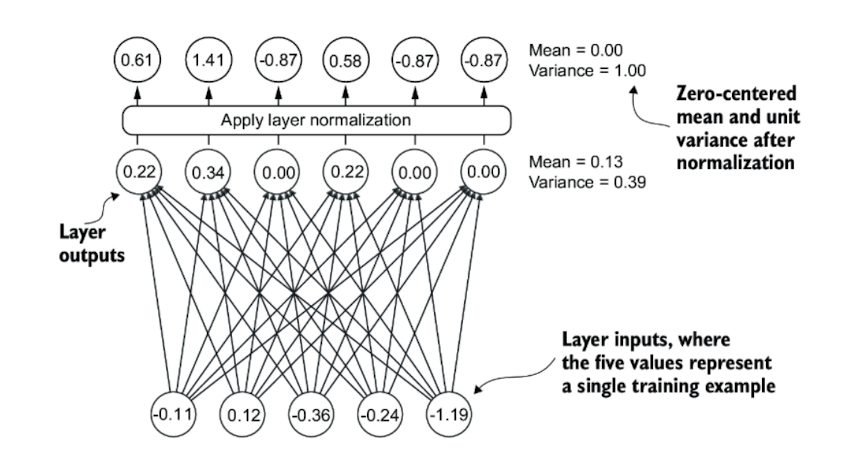

</div>

#### Explanation with a simple example

In [6]:
torch.manual_seed(123)
batch_example = torch.randn(2, 5) #A
layer = nn.Sequential(nn.Linear(5, 6), nn.ReLU())
out = layer(batch_example)
print(out)

tensor([[0.2260, 0.3470, 0.0000, 0.2216, 0.0000, 0.0000],
        [0.2133, 0.2394, 0.0000, 0.5198, 0.3297, 0.0000]],
       grad_fn=<ReluBackward0>)


<div class="alert alert-block alert-info">

The neural network layer we have coded consists of a Linear layer followed by a non-linear
activation function, ReLU (short for Rectified Linear Unit), which is a standard activation
function in neural networks. 

If you are unfamiliar with ReLU, it simply thresholds negative
inputs to 0, ensuring that a layer outputs only positive values, which explains why the
resulting layer output does not contain any negative values. 

(Note that we will use another,
more sophisticated activation function in GPT, which we will introduce in the next section).
</div>

<div class="alert alert-block alert-success">

Before we apply layer normalization to these outputs, let's examine the mean and
variance:

</div>

In [7]:
mean = out.mean(dim=-1, keepdim=True)  
var = out.var(dim=-1, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[0.1324],
        [0.2170]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[0.0231],
        [0.0398]], grad_fn=<VarBackward0>)


<div class="alert alert-block alert-warning">

The first row in the mean tensor above contains the mean value for the first input row, and
the second output row contains the mean for the second input row.
</div>

<div class="alert alert-block alert-warning">

Using keepdim=True in operations like mean or variance calculation ensures that the
output tensor retains the same number of dimensions as the input tensor, even though the
operation reduces the tensor along the dimension specified via dim. 

For instance, without
keepdim=True, the returned mean tensor would be a 2-dimensional vector [0.1324,
0.2170] instead of a 2×1-dimensional matrix [[0.1324], [0.2170]].
</div>

<div class="alert alert-block alert-warning">

For a 2D tensor (like a matrix), using dim=-1 for operations such as
mean or variance calculation is the same as using dim=1. 

This is because -1 refers to the
tensor's last dimension, which corresponds to the columns in a 2D tensor. 

Later, when
adding layer normalization to the GPT model, which produces 3D tensors with shape
[batch_size, num_tokens, embedding_size], we can still use dim=-1 for normalization
across the last dimension, avoiding a change from dim=1 to dim=2.

</div>

<div class="alert alert-block alert-success">

Next, let us apply layer normalization to the layer outputs we obtained earlier. The
operation consists of subtracting the mean and dividing by the square root of the variance
(also known as standard deviation):

</div>

In [8]:
out_norm = (out - mean) / torch.sqrt(var)
mean = out_norm.mean(dim=-1, keepdim=True)
var = out_norm.var(dim=-1, keepdim=True)
print("Normalized layer outputs:\n", out_norm)
print("Mean:\n", mean)
print("Variance:\n", var)

Normalized layer outputs:
 tensor([[ 0.6159,  1.4126, -0.8719,  0.5872, -0.8719, -0.8719],
        [-0.0189,  0.1121, -1.0876,  1.5173,  0.5647, -1.0876]],
       grad_fn=<DivBackward0>)
Mean:
 tensor([[-5.9605e-08],
        [ 1.9868e-08]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


<div class="alert alert-block alert-info">

Note that the value 2.9802e-08 in the output tensor is the scientific notation for 2.9802 ×
10-8, which is 0.0000000298 in decimal form. This value is very close to 0, but it is not
exactly 0 due to small numerical errors that can accumulate because of the finite precision
with which computers represent numbers.
</div>

<div class="alert alert-block alert-success">

To improve readability, we can also turn off the scientific notation when printing tensor
values by setting sci_mode to False:
</div>

In [9]:
torch.set_printoptions(sci_mode=False)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


<div class="alert alert-block alert-success">

Let's now encapsulate this process in a PyTorch module that we can use in the GPT
model later:
</div>

In [10]:
class LayerNorm(nn.Module):
    def __init__(self, emb_dim):
        super().__init__()
        self.eps = 1e-5
        self.scale = nn.Parameter(torch.ones(emb_dim))
        self.shift = nn.Parameter(torch.zeros(emb_dim))

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        var = x.var(dim=-1, keepdim=True, unbiased=False)
        norm_x = (x - mean) / torch.sqrt(var + self.eps)
        return self.scale * norm_x + self.shift

<div class="alert alert-block alert-warning">

This specific implementation of layer Normalization operates on the last dimension of the
input tensor x, which represents the embedding dimension (emb_dim). 

The variable eps is a
small constant (epsilon) added to the variance to prevent division by zero during
normalization. 

The scale and shift are two trainable parameters (of the same dimension
as the input) that the LLM automatically adjusts during training if it is determined that
doing so would improve the model's performance on its training task. 

This allows the model
to learn appropriate scaling and shifting that best suit the data it is processing.

</div>

<div class="alert alert-block alert-success">

In the Transformer architecture, Layer Normalization is applied after each sub-layer (multi-head self-attention and feed-forward network) and before the next sub-layer, as well as before the final output layer. The purpose of the **scale (gamma)** and **shift (beta)** parameters within Layer Normalization is to **restore the representational capacity** that might be lost during the normalization process.

Here's a breakdown of why they are important:

1.  **Normalization Can Be Too Restrictive:** Layer Normalization standardizes the activations of a layer to have a mean of zero and a standard deviation of one. While this helps stabilize training and can speed up convergence, it might be too restrictive. For some layers or for certain features within a layer, having a zero mean and unit variance might not be optimal for the subsequent computations.

2.  **Allowing the Network to Learn the Optimal Distribution:** The scale (gamma) and shift (beta) parameters are learnable parameters, meaning their values are adjusted during the training process through backpropagation, just like the weights and biases of the network.

    * The **scale parameter (gamma)** allows the network to learn the optimal standard deviation for the normalized activations. If gamma is learned to be larger than 1, it will increase the variance; if it's less than 1, it will decrease it.
    * The **shift parameter (beta)** allows the network to learn the optimal mean for the normalized activations. If beta is learned to be non-zero, it shifts the mean away from zero.

3.  **Maintaining Expressiveness:** By including these parameters, Layer Normalization doesn't force every layer's output to have the same distribution. Instead, it provides a way for the network to dynamically adjust the scale and shift of the normalized activations, allowing each layer to have the distribution that is most beneficial for the task it's trying to learn. This helps maintain the representational power of the network.

4.  **Flexibility for Different Layers:** Different layers in the network might require different distributions of activations. For example, some layers might benefit from having activations with a wider range, while others might perform better with activations centered around a different mean. The scale and shift parameters provide this flexibility.

**In essence, the scale and shift parameters in Layer Normalization provide a way to undo the normalization to some extent, allowing the network to learn the most suitable distribution of activations for each layer while still benefiting from the stabilization and acceleration of training that normalization provides.** They allow the network to find a balance between the benefits of normalization and the need for diverse representations in different layers.

</div>

_A small note on biased variance_

<div class="alert alert-block alert-info">

In our variance calculation method, we have opted for an implementation detail by
setting unbiased=False. 

For those curious about what this means, in the variance
calculation, we divide by the number of inputs n in the variance formula. 

This approach does not apply Bessel's correction, which typically uses n-1 instead of n in
the denominator to adjust for bias in sample variance estimation. 

This decision results in a so-called biased estimate of the variance. 

For large-scale language
models (LLMs), where the embedding dimension n is significantly large, the
difference between using n and n-1 is practically negligible. 

We chose this approach to ensure compatibility with the GPT-2 model's normalization layers and because it
reflects TensorFlow's default behavior, which was used to implement the original GPT2 model.
</div>

<div class="alert alert-block alert-success">

Let's now try the LayerNorm module in practice and apply it to the batch input:
</div>

In [12]:
ln = LayerNorm(emb_dim=5)
out_ln = ln(batch_example)
mean = out_ln.mean(dim=-1, keepdim=True)
var = out_ln.var(dim=-1, unbiased=False, keepdim=True)
print("Mean:\n", mean)
print("Variance:\n", var)

Mean:
 tensor([[    -0.0000],
        [     0.0000]], grad_fn=<MeanBackward1>)
Variance:
 tensor([[1.0000],
        [1.0000]], grad_fn=<VarBackward0>)


<div class="alert alert-block alert-info">

As we can see based on the results, the layer normalization code works as expected and
normalizes the values of each of the two inputs such that they have a mean of 0 and a
variance of 1:
</div>